<a href="https://colab.research.google.com/github/marcexpositg/CRISPRed/blob/master/02.Model/2.3.OutcomesProfiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.3. Outcomes profiling

This notebook displays the analysis done on the sequencing data:

- The first section focuses on the distribution of the gRNA efficiency defined as the percentage of edited reads in the simulated data.
- The second section focues on the frequencies of the gene editing outcomes, chacterizing insertions and deletions.
- The third section defines the groups used to train a model to predict the gene editing outcomes, which are the labels used in the 2.6. ActivityModel notebook.

## 1. Efficiency profiling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
efficiency = pd.read_csv('https://raw.githubusercontent.com/marcexpositg/CRISPRed/master/02.Model/Labels/editing_efficiency_sim.csv', names=['ids','Efficiency'])
efficiency

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,ids,Efficiency
0,ENSMUSG00000033788_gR434r,0.01
1,ENSMUSG00000033788_gR113f,0.03
2,ENSMUSG00000033788_gR70f,0.30
3,ENSMUSG00000023020_gR346r,0.26
4,ENSMUSG00000023020_gR376r,0.18
...,...,...
1717,ENSMUSG00000025791_gR257r,0.49
1718,ENSMUSG00000025791_gR494f,0.67
1719,ENSMUSG00000023484_gR261f,0.13
1720,ENSMUSG00000023484_gR270f,0.04


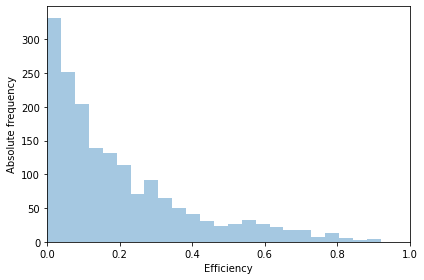

In [2]:
sns.distplot(efficiency.Efficiency, kde=False);
plt.xlim(left=0, right=1)
plt.ylabel('Absolute frequency')
plt.tight_layout()
plt.savefig('EfficiencyDistribution.png', dpi=600)
plt.show()

## 2. Outcomes profiling

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
outcomes = pd.read_csv('https://raw.githubusercontent.com/marcexpositg/CRISPRed/master/02.Model/Labels/outcomes_frequency_sim.csv', index_col=0)
outcomes

,ENSMUSG00000033788_gR434r,ENSMUSG00000033788_gR113f,ENSMUSG00000033788_gR70f,ENSMUSG00000023020_gR346r,ENSMUSG00000023020_gR376r,ENSMUSG00000023020_gR434r,ENSMUSG00000021177_gR34f,ENSMUSG00000021177_gR124r,ENSMUSG00000021177_gR208f,ENSMUSG00000021645_gR59f,ENSMUSG00000021645_gR318f,ENSMUSG00000021645_gR395f,ENSMUSG00000031865_gR354f,ENSMUSG00000031865_gR271r,ENSMUSG00000031865_gR106f,ENSMUSG00000029328_gR364f,ENSMUSG00000029328_gR125r,ENSMUSG00000029328_gR51f,ENSMUSG00000021182_gR380r,ENSMUSG00000021182_gR283f,ENSMUSG00000021182_gR247r,ENSMUSG00000001552_gR319r,ENSMUSG00000001552_gR277f,ENSMUSG00000001552_gR115f,ENSMUSG00000030747_gR459f,ENSMUSG00000030747_gR252r,ENSMUSG00000030747_gR91r,ENSMUSG00000004044_gR456r,ENSMUSG00000004044_gR322f,ENSMUSG00000004044_gR312f,ENSMUSG00000021186_gR374f,ENSMUSG00000021186_gR343f,ENSMUSG00000021186_gR258r,ENSMUSG00000027861_gR180r,ENSMUSG00000027861_gR200f,ENSMUSG00000027861_gR451f,ENSMUSG00000001751_gR57f,ENSMUSG00000001751_gR93r,ENSMUSG00000021189_gR410f,ENSMUSG00000021189_gR277r,...,ENSMUSG00000038642_gR200f,ENSMUSG00000038642_gR275r,ENSMUSG00000031785_gR22r,ENSMUSG00000031785_gR377f,ENSMUSG00000031785_gR480f,ENSMUSG00000079477_gR216r,ENSMUSG00000079477_gR331f,ENSMUSG00000079477_gR491f,ENSMUSG00000030057_gR261f,ENSMUSG00000030057_gR404r,ENSMUSG00000030057_gR408f,ENSMUSG00000001508_gR471f,ENSMUSG00000001508_gR331r,ENSMUSG00000001508_gR51f,ENSMUSG00000029992_gR195f,ENSMUSG00000029992_gR39r,ENSMUSG00000029992_gR17f,ENSMUSG00000057123_gR313f,ENSMUSG00000057123_gR350f,ENSMUSG00000057123_gR372f,ENSMUSG00000021665_gR402f,ENSMUSG00000021665_gR348f,ENSMUSG00000021665_gR343f,ENSMUSG00000071337_gR392f,ENSMUSG00000071337_gR228r,ENSMUSG00000071337_gR66r,ENSMUSG00000033065_gR378r,ENSMUSG00000033065_gR457f,ENSMUSG00000033065_gR479f,ENSMUSG00000019820_gR439f,ENSMUSG00000019820_gR401r,ENSMUSG00000019820_gR203r,ENSMUSG00000034055_gR160f,ENSMUSG00000034055_gR66r,ENSMUSG00000034055_gR31f,ENSMUSG00000025791_gR257r,ENSMUSG00000025791_gR494f,ENSMUSG00000023484_gR261f,ENSMUSG00000023484_gR270f,ENSMUSG00000023484_gR479f
D01-03,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,0.0000,0.000000,0.00000,0.0000,0.00,0.000000,...,0.000000,0.000,0.000000,0.0000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
D01-02,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,0.0000,0.000000,0.00000,0.0000,0.00,0.000000,...,0.000000,0.000,0.000000,0.0000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
D01-01,0.00,0.026667,0.032000,0.051538,0.030000,0.000000,0.000000,0.04,0.035556,0.000000,0.000000,0.045405,0.038182,0.028000,0.000000,0.038644,0.000000,0.042857,0.018039,0.00,0.05875,0.010000,0.032727,0.026786,0.00,0.031429,0.015238,0.0100,0.000000,0.036667,0.025882,0.000000,0.000,0.0344,0.0152,0.045714,0.04625,0.0250,0.05,0.000000,...,0.000000,0.004,0.048889,0.0375,0.034118,0.038,0.014286,0.037778,0.006667,0.031549,0.037333,0.06,NaN,0.016000,0.026923,0.000000,NaN,0.033333,0.033333,0.000000,0.041622,0.000000,0.031304,0.035238,0.000000,0.025714,0.000000,0.022857,0.06,0.034085,0.010,0.04,0.021538,0.0

In [4]:
# Split between insertions and deletions using the outcome code in the index
deletions = outcomes[outcomes.index.str.startswith('D')]
insertions = outcomes[outcomes.index.str.startswith('I')]

### 2.1. Insertions vs. Deletions

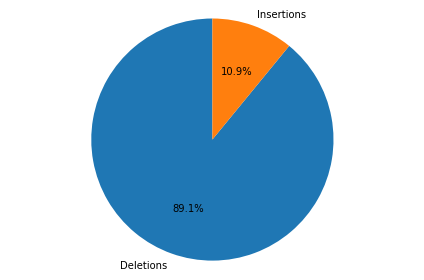

In [5]:
delins_prop = np.array([deletions.sum().sum(), insertions.sum().sum()])
delins_prop = delins_prop / delins_prop.sum()

#fig, ax = plt.subplots()
plt.pie(delins_prop, labels=['Deletions','Insertions'], autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.savefig('DelvsIns.png', dpi=600)
plt.show()
plt.show()

### 2.2. Insertions



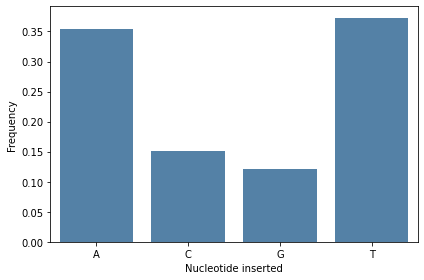

In [6]:
ins_tot = insertions.sum(axis=1)
ins_type = np.array(ins_tot.index.str[5:])
ins_totdf = pd.DataFrame({'Outcomes':ins_tot}) 
ins_totdf['Type'] = ins_type
ins_dist = ins_totdf.drop('I02EMT', axis=0)
ins_dist['Outcomes_freq'] = ins_dist.Outcomes/ins_dist.Outcomes.sum()
sns.barplot(x='Type', y='Outcomes_freq', data=ins_dist, color='steelblue')
plt.ylabel('Frequency')
plt.xlabel('Nucleotide inserted')
plt.tight_layout()
plt.savefig('InsertionDistribution.png', dpi=600)
plt.show()

### 2.3. Deletions

In [7]:
del_tot = deletions.sum(axis=1) 
del_tot

D01-03     0.000000
D01-02     0.000000
D01-01    36.014136
D01+00    92.534679
D01+01     0.000000
            ...    
D29-02     0.066988
D29-01     0.044338
D29+00     0.064958
D29+01     0.000000
D30EMT     9.033476
Length: 552, dtype: float64

In [8]:
del_size = np.array(del_tot.index.str[1:3]).astype(np.int)

In [9]:
del_totdf = pd.DataFrame({'Outcomes':del_tot}) 
del_totdf['Size'] = del_size

In [10]:
del_dist = del_totdf.groupby('Size',as_index = False).sum()
del_dist

,Size,Outcomes
0,1,128.548815
1,2,133.056533
2,3,127.476240
3,4,127.501897
4,5,114.411852
5,6,113.736996
6,7,104.432054
7,8,91.475664
8,9,81.645882
9,10,74.808000


In [11]:
# normalize counts to sum up to 1, create relative frequency of each size
del_dist['Outcomes_freq'] = del_dist.Outcomes/del_dist.Outcomes.sum()
del_dist

,Size,Outcomes,Outcomes_freq
0,1,128.548815,0.086837
1,2,133.056533,0.089882
2,3,127.476240,0.086112
3,4,127.501897,0.086129
4,5,114.411852,0.077287
5,6,113.736996,0.076831
6,7,104.432054,0.070545
7,8,91.475664,0.061793
8,9,81.645882,0.055153
9,10,74.808000,0.050534


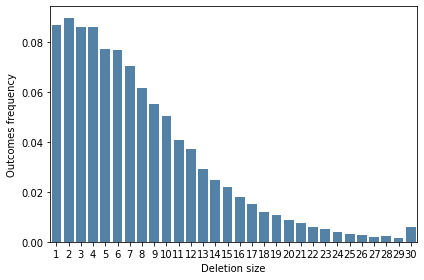

In [12]:
sns.barplot(x='Size', y='Outcomes_freq', data=del_dist, color='steelblue')
plt.ylabel('Outcomes frequency')
plt.xlabel('Deletion size')
plt.tight_layout()
plt.savefig('DeletionDistribution.png', dpi=600)
plt.show()

## 3. Making groups of labels

To simplify the gene editing outcomes modelling, multiple outcomes are grouped into groups based on the deletion size.


### 3.1. Only two groups of deletions

Approximately half of the deletions are less than 5bp:

In [13]:
del_groups = pd.DataFrame({'Del_group':['Less or equal than 5bp','More than 5bp'],
              'Frequency':[del_dist.loc[:4,'Outcomes_freq'].sum(),del_dist.loc[5:,'Outcomes_freq'].sum()]})

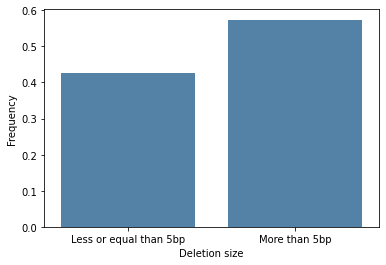

In [14]:
sns.barplot(x='Del_group', y='Frequency', data=del_groups, color='steelblue')
plt.ylabel('Frequency')
plt.xlabel('Deletion size')
plt.show()

One of the models predicts the major outcome. Hence, the dataset should contain gRNAs which major outcome is each of the studied classes.

By grouping deletions only by <5bp or >5bp deletions, the frequencies of these groups are so large that insertions are not the major class for any gRNA of the library. Hence, using only two groups is discarded.

In [15]:
multcl_data = pd.DataFrame()
multcl_data['LessEq_5bp'] = deletions.loc[:'D05+01',].sum()
multcl_data['More_5bp']   = deletions.loc['D06-08':,].sum()
multcl_data['Insertion']  = insertions.sum()
multcl_data['MaxClass']   = multcl_data.idxmax(axis=1)
multcl_data.MaxClass.value_counts()

More_5bp      1132
LessEq_5bp     590
Name: MaxClass, dtype: int64

### 3.2. Seven groups of deletions

Since creating only 2 groups for deletions made these groups so frequent that no gRNA had insertions as a major outcome (and we need them to train the model), deletions should be divided in a higher number of groups.

By creating 7 deletions groups, the outcomes can be classified in groups with a similar frequency. Deletions are grouped by sizes, and the frequency shown here indicates the global of the simulated data.

Note that insertions are not included in the graph, and since they represent about a 10% of the total of data, they would be less frequent than the rest of deletion groups.

In [16]:
del_groups = pd.DataFrame({'Del_group':['Less or equal 2bp','3bp to 4bp',
                                        '5bp to 6bp','7bp to 8bp',
                                        '9bp to 11bp','12bp to 14bp',
                                        '15bp to all'],
              'Frequency':[del_dist.loc[:1,'Outcomes_freq'].sum(),
                           del_dist.loc[2:3,'Outcomes_freq'].sum(),
                           del_dist.loc[4:5,'Outcomes_freq'].sum(),
                           del_dist.loc[6:7,'Outcomes_freq'].sum(),
                           del_dist.loc[8:10,'Outcomes_freq'].sum(),
                           del_dist.loc[11:13,'Outcomes_freq'].sum(),
                           del_dist.loc[14:,'Outcomes_freq'].sum(),
                           ]})

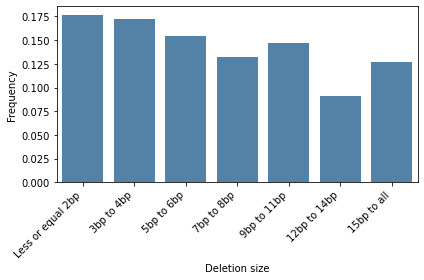

In [17]:
plt.figure()
brpt = sns.barplot(x='Del_group', y='Frequency', data=del_groups, color='steelblue')
plt.ylabel('Frequency')
plt.xlabel('Deletion size')
brpt.set_xticklabels(brpt.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.savefig('DeletionGroups.png', dpi=600)
plt.show()

By dividing the deletion sizes in multiple classes, some insertions are included in the predictions. Note that the data set used to train the model based on the major class of outcome will have its data biased. The results on the thesis show that the less represented classes are also less predicted, which indicates that these biases are a major issue, and that all classes should have more similar sizes. However, these would require to increase the number of gene editing outcomes classes considerably, making the model too complex.

In [18]:
multcl_data = pd.DataFrame()
multcl_data['LessEq_2bp'] = deletions.loc[:'D02+01',].sum()
multcl_data['3bp_4bp']    = deletions.loc['D03-05':'D04+01',].sum()
multcl_data['5bp_6bp']    = deletions.loc['D05-07':'D06+01',].sum()
multcl_data['7bp_8bp']    = deletions.loc['D07-09':'D08+01',].sum()
multcl_data['9bp_11bp']   = deletions.loc['D09-11':'D11+01',].sum()
multcl_data['12bp_14bp']  = deletions.loc['D12-14':'D14+01',].sum()
multcl_data['More_15bp']  = deletions.loc['D15-17':,].sum()
multcl_data['Insertion']  = insertions.sum()
multcl_data['MaxClass']   = multcl_data.idxmax(axis=1)
multcl_data.MaxClass.value_counts()

LessEq_2bp    395
3bp_4bp       316
5bp_6bp       272
9bp_11bp      261
7bp_8bp       240
More_15bp     104
12bp_14bp      77
Insertion      57
Name: MaxClass, dtype: int64

### 3.3. Exporting the results

The data frame with the frequencies of each class is used to train the results prediction model as shown in notebook 2.6.OutcomesModel.ipynb.

In [19]:
multcl_data

,LessEq_2bp,3bp_4bp,5bp_6bp,7bp_8bp,9bp_11bp,12bp_14bp,More_15bp,Insertion,MaxClass
ENSMUSG00000033788_gR434r,0.080000,0.060000,0.040000,0.200000,0.160000,0.160000,0.060000,0.240000,Insertion
ENSMUSG00000033788_gR113f,0.086667,0.046667,0.206667,0.120000,0.273333,0.060000,0.153333,0.053333,9bp_11bp
ENSMUSG00000033788_gR70f,0.127333,0.086667,0.144000,0.048000,0.288667,0.054667,0.108667,0.142000,9bp_11bp
ENSMUSG00000023020_gR346r,0.146923,0.326923,0.046923,0.142308,0.128462,0.062308,0.075385,0.070769,3bp_4bp
ENSMUSG00000023020_gR376r,0.158889,0.102222,0.071111,0.058889,0.416667,0.067778,0.093333,0.031111,9bp_11bp
...,...,...,...,...,...,...,...,...,...
ENSMUSG00000025791_gR257r,0.349796,0.124898,0.122449,0.042449,0.113878,0.024490,0.107347,0.114694,LessEq_2bp
ENSMUSG00000025791_gR494f,0.094627,0.225672,0.352836,0.061493,0.162388,0.020896,0.031343,0.050746,5bp_6bp
ENSMUSG00000023484_gR261f,0.156923,0.292308,0.147692,0.089231,0.055385,0.032308,0.107692,0.118462,3bp_4bp
ENSMUSG00000023484_gR270f,0.065000,0.095000,0.100000,0.030000,0.575000,0.015000,0.085000,0.035000,9bp_11bp


In [20]:
multcl_data.to_csv('outcomes_freq_simp.csv')

The file generated was manually uploaded to Github at: https://raw.githubusercontent.com/marcexpositg/CRISPRed/master/02.Model/Labels/outcomes_freq_simp.csv

Then, this file is used as the labels for the results prediction model.